<a href="https://colab.research.google.com/github/bmotana/bmotana.github.io/blob/main/springbok_rugby_wiki_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required libraries

In [ ]:
import pandas as pd
import time
import ssl
from urllib.error import HTTPError
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
ssl._create_default_https_context = ssl._create_unverified_context

# Extracts tables

In [ ]:
# DataFrame containing tables without extracting links
rugby_players_tables_no_links = pd.read_html('https://en.wikipedia.org/wiki/List_of_South_Africa_national_rugby_union_players')

# DataFrame containing tables with links extracted
rugby_players_tables_with_links = pd.read_html('https://en.wikipedia.org/wiki/List_of_South_Africa_national_rugby_union_players', extract_links="body")


# Fetch Table General Player Data

Figure and choose the right table

In [ ]:
df = rugby_players_tables_no_links[0]

check to table information to make sure

In [ ]:
df.columns
df.iloc[1]

List of South Africa national rugby union players            Number[37]
List of South Africa national rugby union players.1                Name
List of South Africa national rugby union players.2          Test debut
List of South Africa national rugby union players.3    Debut opposition
List of South Africa national rugby union players.4                Caps
List of South Africa national rugby union players.5              Points
List of South Africa national rugby union players.6               Tries
List of South Africa national rugby union players.7                Cons
List of South Africa national rugby union players.8                Pens
List of South Africa national rugby union players.9                 DGs
Name: 1, dtype: object

clean and structuring the data

In [ ]:
# Assuming df is your original DataFrame
original_df = df.copy()  # Step 1: Save the original DataFrame

# Set the column names to the second row
df.columns = original_df.iloc[1]
df.rename(columns={'Number[37]':'Number'}, inplace=True)
original_df =  df.copy()

# Create a new DataFrame without the first two rows
clean_data = original_df.iloc[2:-1].reset_index(drop=True)  # Step 2: Reset the index

check to make sure everything is correct

In [ ]:
clean_data.tail(50)

1,Number,Name,Test debut,Debut opposition,Caps,Points,Tries,Cons,Pens,DGs
883,884,Andries Coetzee,10 June 2017,France,13,0,0,0,0,0
884,885,Dillyn Leyds,10 June 2017,France,10,5,1,0,0,0
885,886,Ruan Dreyer,24 June 2017,France,4,5,1,0,0,0
886,887,Curwin Bosch,19 August 2017,Argentina,2,0,0,0,0,0
887,888,Wilco Louw,7 October 2017,New Zealand,14,0,0,0,0,0
888,889,Dan du Preez,18 November 2017,France,6,0,0,0,0,0
889,890,Warrick Gelant,25 November 2017,Italy,13,15,3,0,0,0
890,891,Louis Schreuder,2 December 2017,Wales,1,0,0,0,0,0
891,892,Lukhanyo Am,2 December 2017,Wales,35,30,6,0,0,0
892,893,Ox Nche,2 December 2017,Wales,28,0,0,0,0,0


# Fetch Table for Player Link Data

Figure out and pick the right table and check

In [ ]:
df_two = rugby_players_tables_with_links[0]
df_two['List of South Africa national rugby union players.1']

0                                                  NaN
1                                         (Name, None)
2                 (Benjamin Duff, /wiki/Benjamin_Duff)
3           (Mosey van Buuren, /wiki/Mosey_van_Buuren)
4                     (Chubb Vigne, /wiki/Chubb_Vigne)
                            ...                       
931                 (Canan Moodie, /wiki/Canan_Moodie)
932                 (Manie Libbok, /wiki/Manie_Libbok)
933                     (Jean Kleyn, /wiki/Jean_Kleyn)
934     (Gerhard Steenekamp, /wiki/Gerhard_Steenekamp)
935    (Updated after the 2023 Rugby World Cup., None)
Name: List of South Africa national rugby union players.1, Length: 936, dtype: object

get the columns with only player links

In [ ]:
original_df_two = df_two.copy()
start_index = 2  # Replace with your actual start index
end_index = 934
text_to_append = 'https://en.wikipedia.org'
df_two.loc[start_index:end_index,'List of South Africa national rugby union players.1'] = df_two.loc[ start_index:end_index,'List of South Africa national rugby union players.1'].apply(lambda x: text_to_append + str(x[1]) if isinstance(x, tuple) else x)
df_two['List of South Africa national rugby union players.1']

0                                                   NaN
1                                          (Name, None)
2           https://en.wikipedia.org/wiki/Benjamin_Duff
3        https://en.wikipedia.org/wiki/Mosey_van_Buuren
4             https://en.wikipedia.org/wiki/Chubb_Vigne
                             ...                       
931          https://en.wikipedia.org/wiki/Canan_Moodie
932          https://en.wikipedia.org/wiki/Manie_Libbok
933            https://en.wikipedia.org/wiki/Jean_Kleyn
934    https://en.wikipedia.org/wiki/Gerhard_Steenekamp
935     (Updated after the 2023 Rugby World Cup., None)
Name: List of South Africa national rugby union players.1, Length: 936, dtype: object

just check to make sure

In [ ]:
df_two.iloc[start_index:-1, 1]
df_two.iloc[33, 1]

'https://en.wikipedia.org/wiki/Ferdie_Aston'

# Test the Single Player Link Data and Test School Link Data


In [ ]:
link_test = df_two.iloc[-2, 1]
tables = pd.read_html(link_test)
player_info = tables[1]
player_info

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,Full name,Gerhardus Cornelis Steenekamp,NaN,NaN
2,Date of birth,(age 27),NaN,NaN
3,Place of birth,"Potchefstroom, South Africa",NaN,NaN
4,Height,.mw-parser-output .frac{white-space:nowrap}.mw...,NaN,NaN
5,Weight,128 kg (282 lb),NaN,NaN
6,School,Potchefstroom Gimnasium,NaN,NaN
7,Rugby union career,Rugby union career,NaN,NaN
8,Position(s) PropCurrent team Bulls / Blue Bull...,Position(s) PropCurrent team Bulls / Blue Bull...,NaN,NaN
9,Position(s),Prop,Prop,Prop


In [ ]:
row_columns_swap = player_info.transpose()
row_columns_swap.columns = row_columns_swap.iloc[0]
row_columns_swap = row_columns_swap.drop(row_columns_swap.index[0])
row_columns_swap["School"]
row_columns_swap.iloc[0,6]
row_columns_swap

,NaN,Full name,Date of birth,Place of birth,Height,Weight,School,Rugby union career,Position(s) PropCurrent team Bulls / Blue BullsSenior careerYears Team Apps (Points)2020–present Bulls 33 (0)2020– Blue Bulls 15 (5) Correct as of 23 July 2022International careerYears Team Apps (Points)2017 South Africa Under-20 5 (0) Correct as of 3 March 2021,Position(s),Current team,Senior career,Years,2020–present,2020–,Correct as of 23 July 2022,International career,Years,2017,Correct as of 3 March 2021
1,NaN,Gerhardus Cornelis Steenekamp,(age 27),"Potchefstroom, South Africa",.mw-parser-output .frac{white-space:nowrap}.mw...,128 kg (282 lb),Potchefstroom Gimnasium,Rugby union career,Position(s) PropCurrent team Bulls / Blue Bull...,Prop,Bulls / Blue Bulls,Senior career,Team,Bulls,Blue Bulls,Correct as of 23 July 2022,International career,Team,South Africa Under-20,Correct as of 3 March 2021
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prop,Bulls / Blue Bulls,Senior career,Apps,33,15,Correct as of 23 July 2022,International career,Apps,5,Correct as of 3 March 2021
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prop,Bulls / Blue Bulls,Senior career,(Points),(0),(5),Correct as of 23 July 2022,International career,(Points),(0),Correct as of 3 March 2021


check if column header is present and if so return None or (NaN)

In [ ]:
column_name = "School"
if column_name in row_columns_swap:
    print(row_columns_swap.iloc[0,6])

Potchefstroom Gimnasium


#### test if every link works

function

In [ ]:
def test_all_links():
  for i in range(2, 933):
    link_test = df_two.iloc[i, 1]  # specific link
    try:
        tables = pd.read_html(link_test)
    except HTTPError:
          print(f"{i} - No School Found (HTTP Error) - {link_test}")

In [ ]:
test_all_links()

90 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Joe_Anderson_(rugby_union)&action=edit&redlink=1
92 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Arthur_Burmeister&action=edit&redlink=1
93 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Arthur_Marsberg&action=edit&redlink=1
95 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Japie_le_Roux&action=edit&redlink=1
100 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Bingo_Burger&action=edit&redlink=1
101 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Cocky_Brooks&action=edit&redlink=1
102 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=William_Neill_(rugby_union)&action=edit&redlink=1
103 - No School Found (HTTP Error) - https://en.wikipedia.org/w/index.php?title=Pinkie_Daneel&action=edit&redlink=1
104 - No School Found (HTTP Error) - https://

KeyboardInterrupt: 

# Gather School Data

#### make a function that get school names

In [ ]:
def get_school_name(indx: int, table_choice=1, with_indx=False):
    link_test = df_two.iloc[indx, 1]  # wif specific link

    try:
        tables = pd.read_html(link_test)
    except HTTPError:
        if with_indx:
            return f"{indx} - No School Found (HTTP Error)"
        else:
            return "No School Found (HTTP Error)"

    player_info = tables[table_choice]
    row_columns_swap = player_info.transpose()
    row_columns_swap.columns = row_columns_swap.iloc[0]
    row_columns_swap = row_columns_swap.drop(row_columns_swap.index[0])

    try:
        row_columns_swap.iloc[0, 6]
    except IndexError:
        pass

    column_name = "School"
    if column_name in row_columns_swap:
        column_index = row_columns_swap.columns.get_loc(column_name)
        school = row_columns_swap.iloc[0, column_index]
        if with_indx:
            return f"{indx} - {clean_text(school)}"
        else:
            return clean_text(school)
    elif table_choice == 1:
        return get_school_name(indx, table_choice=0, with_indx=with_indx)
    else:
        if with_indx:
            return f"{indx} - No School Found"
        else:
            return "No School Found"


##### make text cleaning functions

make function for removing every after a comma

In [ ]:
def remove_after_comma(s):
    """
    Removes everything in the string after the first comma, including the comma itself.

    Args:
    s (str): The input string.

    Returns:
    str: The string with everything after the first comma removed.
    """
    # Find the index of the first comma
    comma_index = s.find(',')

    # If there's no comma, return the original string
    if comma_index == -1:
        return s

    # Return the substring up to the first comma
    return s[:comma_index]


make function for removing everything in string before the last curly bracket

In [ ]:
def remove_before_last_curly_bracket(s):
    """
    Removes everything in the string before the last curly bracket '}' and the curly bracket itself.

    Args:
        s (str): The input string.

    Returns:
        str: The modified string after the last curly bracket.
    """
    # Find the index of the last occurrence of '}'
    last_curly_index = s.rfind('}')

    # If there is no '}' in the string, return the original string
    if last_curly_index == -1:
        return s

    # Return the substring after the last '}'
    return s[last_curly_index + 2:]

combined the two functions

In [ ]:
def clean_text(s):
  s = remove_before_last_curly_bracket(s)
  s = remove_after_comma(s)
  return s

####test the function

single test

In [ ]:
get_school_name(-2)

'Potchefstroom Gimnasium'

doing multiple tests from the back

In [ ]:
for i in range(-2, -20, -1):
  print(get_school_name(i))

Potchefstroom Gimnasium
Hoërskool Linden
HTS Daniël Pienaar
Hoër Landbouskool Boland
Paarl Gimnasium
Pietersburg High School
Hoërskool Wonderboom
Maritzburg College
Paulus Joubert Secondary School
Midstream College Paarl Boys' High School
Paarl Boys' High School
Hoërskool Transvalia
Afrikaanse Hoër Seunskool
Dale College Boys Primary School Glenwood High School
HTS Louis Botha THS
Hoërskool Upington
Kingswood College
Dale College Boys' High School


doing multiple tests from the front

In [ ]:
for i in range(2, 50, 1):
  print(get_school_name(i))

SACS[1]
Diocesan College[1]
New College
Diocesan College[1] and St. Andrew's College
Diocesan College[1]
No School Found
SACS
Diocesan College
No School Found
SACS
Paul Roos Gymnasium
No School Found
Kimberley Boys' High School
No School Found
No School Found
Paul Roos Gymnasium
No School Found
No School Found
Swellendam
No School Found
No School Found
No School Found
Wynberg Boy's High School
Bishops
Green Point Grammar School
Diocesan College
Paul Roos Gymnasium
No School Found
St Aidans College
No School Found
No School Found
No School Found
No School Found
Bishops
SACS
Bishops
Burton Grammar School
No School Found
No School Found
St. Andrew's College
Diocesan College
George Watson's College
St. Andrew's College
Diocesan College
Bishops
No School Found
De La Salle College
No School Found


# Detour

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# do cookies have anything to do with this

url = 'https://saschoolsports.co.za/rugby-schools-with-the-most-springboks/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Fetch the content using requests and the user-agent header
response = requests.get(url, headers=headers)
response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code

# Parse the content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Assuming the table is present in the HTML, we can use pandas to read the tables
tables = pd.read_html(str(soup))
# tables = pd.read_html(soup)


# Display the first table (or process as needed)
if tables:
    rugby_schools_with_springboks = tables[0]
    # print(rugby_schools_with_springboks)
else:
    print("No tables found on the webpage.")


filter out no relevent data

In [ ]:
most_springboks = rugby_schools_with_springboks.iloc[0:, 5:]

remove rows with None in it

In [ ]:
cp1_most_springboks = most_springboks.copy()
most_springboks_dropna = cp1_most_springboks.dropna(axis=0)
most_springboks_dropna

,5,6
0,S P R I N G S B O K S S I N C E 1 9 9 2,S P R I N G S B O K S S I N C E 1 9 9 2
1,SCHOOL,NO.
2,Grey College,29
3,Paarl Gimnasium,14
4,Paul Roos Gym,11
...,...,...
244,Wilgers,1
245,Windhoek,1
246,Zeerust,1
247,Zwartkop,1


clean and restructure the data

In [ ]:
original_df = most_springboks_dropna.copy()
most_springboks_dropna.columns = original_df.iloc[1]
original_df =  most_springboks_dropna.copy()
clean_springbok_data = original_df.iloc[2:-1].reset_index(drop=True)
clean_springbok_data.tail(25)

1,SCHOOL,NO.
221,St Thomas (PE),1
222,Steenberg,1
223,Stellenbosch,1
224,Swartberg,1
225,Swartland,1
226,Swellendam,1
227,Tom Naude,1
228,Transvalia,1
229,Tuine,1
230,Upington,1


In [ ]:
clean_data.tail(19)
latest_springbok_data = clean_data.iloc[915:,:3:]
reverse_order_springboks_data = latest_springbok_data.sort_values(['Number'], ascending=[False])
reverse_order_springboks_data

1,Number,Name,Test debut
932,933,Gerhard Steenekamp,5 August 2023
931,932,Jean Kleyn,8 July 2023
930,931,Manie Libbok,3 September 2022
929,930,Canan Moodie,3 September 2022
928,929,Grant Williams,9 July 2022
927,928,Deon Fourie,9 July 2022
926,927,Ruan Nortjé,9 July 2022
925,926,Ntuthuko Mchunu,9 July 2022
924,925,Kurt-Lee Arendse,9 July 2022
923,924,Evan Roos,9 July 2022


change the format of the dates

In [ ]:
reverse_order_springboks_data.iloc[0,-1]

'5 August 2023'

In [ ]:
changing_date = reverse_order_springboks_data.copy()
changing_date['Test debut'] = pd.to_datetime(changing_date['Test debut'], format='%d %B %Y').dt.strftime('%d/%m/%Y')
changing_date

1,Number,Name,Test debut
932,933,Gerhard Steenekamp,05/08/2023
931,932,Jean Kleyn,08/07/2023
930,931,Manie Libbok,03/09/2022
929,930,Canan Moodie,03/09/2022
928,929,Grant Williams,09/07/2022
927,928,Deon Fourie,09/07/2022
926,927,Ruan Nortjé,09/07/2022
925,926,Ntuthuko Mchunu,09/07/2022
924,925,Kurt-Lee Arendse,09/07/2022
923,924,Evan Roos,09/07/2022


append the schools to this list

In [ ]:
schools = []
for i in range(-2, -20, -1):
  schools.append(get_school_name(i))
latest_springbok_data_w_dates = changing_date.copy()
latest_springbok_data_w_dates['schools'] = schools
latest_springbok_data_w_dates

1,Number,Name,Test debut,schools
932,933,Gerhard Steenekamp,05/08/2023,Potchefstroom Gimnasium
931,932,Jean Kleyn,08/07/2023,Hoërskool Linden
930,931,Manie Libbok,03/09/2022,HTS Daniël Pienaar
929,930,Canan Moodie,03/09/2022,Hoër Landbouskool Boland
928,929,Grant Williams,09/07/2022,Paarl Gimnasium
927,928,Deon Fourie,09/07/2022,Pietersburg High School
926,927,Ruan Nortjé,09/07/2022,Hoërskool Wonderboom
925,926,Ntuthuko Mchunu,09/07/2022,Maritzburg College
924,925,Kurt-Lee Arendse,09/07/2022,Paulus Joubert Secondary School
923,924,Evan Roos,09/07/2022,Midstream College Paarl Boys' High School


Merge the data

In [ ]:
outdate_springbok_school = rugby_schools_with_springboks.iloc[2:,:4]
outdate_springbok_school.columns = latest_springbok_data_w_dates.columns
complete_springbok_data = pd.concat([latest_springbok_data_w_dates, outdate_springbok_school], ignore_index=True)

save the data


In [ ]:
complete_springbok_data.to_csv("general_complete_springbok_data.csv", index=False, encoding='utf-8')

In [ ]:
clean_springbok_data.to_csv("clean_springbok_school_data.csv", index=False, encoding='utf-8')

In [ ]:
duplicates = clean_springbok_data[clean_springbok_data.duplicated('SCHOOL', keep=False)]
duplicates.head(25)

1,SCHOOL,NO.
20,Boland Landbou,3
21,Durban High School,3
23,Boland Landbou,3
25,Durban High School,3
38,AHS Kroonstad,3
40,Ben Viljoen,2
41,Brackenfell,2
44,Ermelo,2
45,Framesby,2
46,Glenwood,2


# Detour 2

In [ ]:
df = pd.read_csv("general_complete_springbok_data.csv")

### count the school

In [ ]:
school_counts_series_2 = df.groupby('schools').size().reset_index(name='count')

sort the data

In [ ]:
ult_springbok_school_data_2 = school_counts_series_2.sort_values(["count", "schools"], ascending=[0, 1]).reset_index(drop=True)
ult_springbok_school_data_2.head(15)

,schools,count
0,Grey College,45
1,Paul Roos Gym,39
2,Bishops,37
3,Paarl Boys High,25
4,Paarl Gim,24
5,SACS,22
6,Kimberley Boys High,18
7,Maritzburg College,15
8,Grey High School,13
9,Dale College,12


### check if there is duplicates

In [ ]:
duplicate_schools_df = ult_springbok_school_data_2[ult_springbok_school_data_2.duplicated()]

,schools,count


### check for forward slashes and output the data for manual data cleaning/refining

In [ ]:
# look for forwards slashes or backslashes
filtered_df = ult_springbok_school_data_2[ult_springbok_school_data_2['schools'].str.contains(r'/| /|/ | / ')]
filtered_df.to_csv("forward_slash_output.csv",  index=False)

In [ ]:
ult_springbok_school_data_2.to_csv("output.csv",  index=False)

### importing the data and sorting

In [ ]:
df = pd.read_csv("to_be_sorted.csv")

sort the list

In [ ]:
final_list = df.sort_values(["count", "schools"], ascending=[0, 1]).reset_index(drop=True)

In [ ]:
final_list.head(25)

,schools,count
0,Grey College,46
1,Paul Roos Gym,44
2,Bishops,39
3,Paarl Gim,28
4,SACS,27
5,Paarl Boys High,25
6,Kimberley Boys High,21
7,Rondebosch,20
8,Maritzburg College,17
9,Grey High School,16


some quantiles

In [ ]:
final_list.iloc[0:, 1].quantile(0.90)

4.0

In [ ]:
final_list.to_csv("final_list.csv", index=False)

# Stats/Data Analysis/Exploratory Analysis

load the the dataset

In [ ]:
df = pd.read_csv("final_list.csv")
province = ["Eastern Cape", "Western Cape", "Western Cape", "Western Cape", "Western Cape", #SACS
            "Western Cape", "Northern Cape", "Western Cape", "KwaZulu-Natal", "Eastern Cape",# Grey High School
            "Eastern Cape", "Gauteng", "Eastern Cape", "Eastern Cape", "Western Cape", #Wynberg
             "KwaZulu-Natal", "Gauteng", "Eastern Cape", "Western Cape", "KwaZulu-Natal", #Glenwood
            "Free State", "Free State", "KwaZulu-Natal", "Gauteng", "Gauteng", #waterkloff
            "Western Cape", "Eastern Cape", "Western Cape", "Gauteng", "Western Cape" #Outenqua
            ]
top_30_schools_df = df[['schools',"count"]][:30]
top_30_schools_df["province"] = province

,schools,count,province
0,Grey College,46,Eastern Cape
1,Paul Roos Gym,44,Western Cape
2,Bishops,39,Western Cape
3,Paarl Gim,28,Western Cape
4,SACS,27,Western Cape
5,Paarl Boys High,25,Western Cape
6,Kimberley Boys High,21,Northern Cape
7,Rondebosch,20,Western Cape
8,Maritzburg College,17,KwaZulu-Natal
9,Grey High School,16,Eastern Cape


check the types of data

In [ ]:
df.dtypes

schools    object
count       int64
dtype: object

In [ ]:
top_30_schools_df.shape

(30, 3)

## Stats

In [ ]:
top_30_schools_df.describe()

,count
count,30.000000
mean,14.266667
std,11.956627
min,5.000000
25%,6.000000
50%,8.500000
75%,19.250000
max,46.000000


In [ ]:
top_30_schools_df.groupby(["province"]).sum()["count"]
top_30_schools_df["count"].sum()

428

Number of Springboks Schools out of around 6000

In [ ]:
springbok_producing_schools_amount = df["count"].count()
southafrica_highschoola_amount = 6000
springbok_producing_schools_amount

337

Average Sprinboks Per School

In [ ]:
df["count"].mean()

2.71513353115727

Percentage of school that produce springboks

In [ ]:
int(round(springbok_producing_schools_amount/southafrica_highschoola_amount, ndigits=3) * 100)

5

Average Springboks Top 10, 5 Percent Produce

In [ ]:
for i in range(90, 100, 5):
  percentage = i/100
  print(df["count"].quantile(percentage))

4.0
8.0


## Visualization

### Boxplot

<Axes: xlabel='count'>

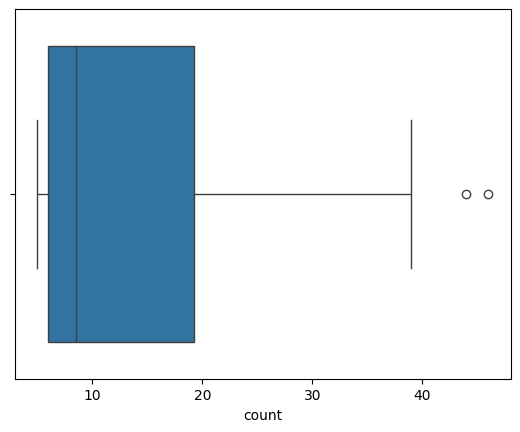

In [ ]:
sns.boxplot(x=top_30_schools_df['count'])

### Pie chart

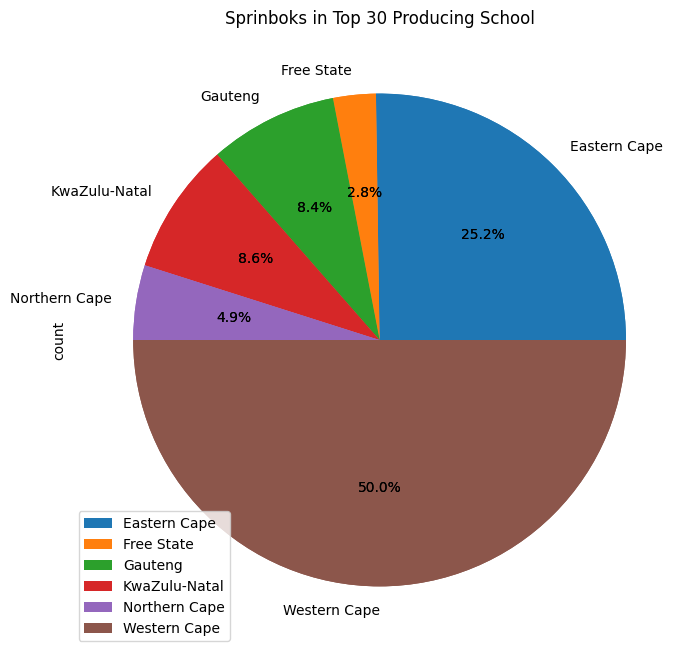

In [ ]:
top_30_schools_df.groupby(["province"]).sum().plot.pie(y="count", figsize=(8, 8), subplots=True, autopct="%1.1f%%")
x = top_30_schools_df.groupby(["province"]).sum()["count"]
plt.pie(x=x,autopct="%1.1f%%")
plt.title('Sprinboks in Top 30 Producing School')
plt.show()